Image Upscaling using Fast super resolution convolutional neural networks (FSRCNN)

Written by Guilherme Leite and Rafael Rosenzvaig

Professor Fábio Ayres

Insper - November 2020

In [1]:
# https://blog.paperspace.com/image-super-resolution/
# https://debuggercafe.com/image-super-resolution-using-deep-learning-and-pytorch/
# http://www.cse.yorku.ca/~mbrown/pdf/eccv10_SR.pdf

In [2]:
import os
import math
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt

url = "http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz"

data_path = tf.keras.utils.get_file(origin=url, untar=True, fname="BSR") # Downloads and extracts the filesystem
root_path = os.path.join(data_path, "BSDS500/data")   

70770688/70763455 [==============================] - 4s 0us/step


In [3]:
# Creates the Trainig and Validation datasets and sets image sizes to 256x256 by default
train_data_raw =    tf.keras.preprocessing.image_dataset_from_directory(root_path, label_mode=None, validation_split=0.2, subset="training",   seed=42)
validate_data_raw = tf.keras.preprocessing.image_dataset_from_directory(root_path, label_mode=None, validation_split=0.2, subset="validation", seed=42)

Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.


In [52]:
# Scales the images so that each pixel value ranges from 0 to 1
#######
def scale(img):
    return (img)/255.0

train_data = train_data_raw.map(scale)
validate_data = validate_data_raw.map(scale)

In [53]:
dataset_path = os.path.join(root_path, "images")
test_path = os.path.join(dataset_path, "test")

# Creates a list with the paths of all images in the testing subset and then sorts it

test_imgs = []

for img in os.listdir(test_path):
  if img.endswith(".jpg"):
    test_imgs.append(os.path.join(test_path, img))

test_imgs = sorted(test_imgs)

In [54]:
target_size = 128 # We will reduce the image's size by half so we can upscale it later on
upscale_factor = 2

def process_input(img, target_size, upscale_factor):
    return tf.image.resize(img, [target_size, target_size], method="area")


def process_target(img):
    img = tf.image.rgb_to_yuv(img) # Change the image format to yuv scale, 
    return tf.split(img, 3, axis=3)[0]


train_data_yuv = train_data.map(process_target)
train_data_scaled = train_data_yuv.map(lambda img: (process_input(img, target_size, upscale_factor), img))

train_ds = train_data_scaled.prefetch(buffer_size=32) #

validate_data_yuv = validate_data.map(process_target)
validate_data_scaled = validate_data_yuv.map(lambda img: (process_input(img, target_size, upscale_factor), img))

valid_ds = validate_data_scaled.prefetch(buffer_size=32) #


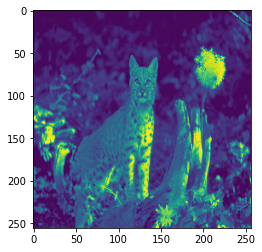

<Figure size 18432x18432 with 0 Axes>

(256, 256) 



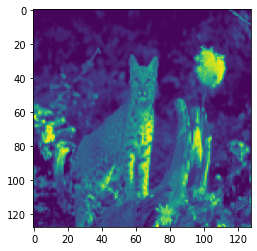

<Figure size 9216x9216 with 0 Axes>

(128, 128)


In [55]:
l = list(train_ds)

img1 = tf.keras.preprocessing.image.array_to_img(l[0][1][0])
plt.imshow(img1)
plt.figure(figsize=(img1.size[0], img1.size[1]))
plt.show()
print(img1.size,"\n")

img2 = tf.keras.preprocessing.image.array_to_img(l[0][0][0])
plt.imshow(img2)
plt.figure(figsize=(img2.size[0], img2.size[1]))
plt.show()
print(img2.size)